<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/BERT_%EB%AA%A8%EB%8D%B8_%EA%B0%9C%EB%85%90_%EA%B3%B5%EB%B6%80_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 자료
https://happy-obok.tistory.com/23 

# **BERT**
BERT: Bidirectional Encoder Representations from Transformers
- 다양한 자연어 처리 분야에서 좋은 성능을 보이고 있음

<br>

##**BERT의 특징**
1. 전이학습 모델
- 사전에 학습된 대용량의 레이블링 되지 않는 데이터를 이용하여 언어 모델(language Model)을 학습
- 이를 토대로 특정 작업(문서 분류, 질의 응답, 번역 등)을 위한 신경망을 추가하는 전이 학습 방법
2. 사전 학습 모델
- 기본적으로 대량의 단어 임베딩 등에 대해 사전 학습이 되어있는 모델을 제공하므로 상대적으로 적은 자원으로 자연어 처리 수행 가능

<br>

##**BERT 구조**
###BERT의 input representation
1. Token Embeddings
2. Segment Embeddings
3. Position Embeddings
세 가지 임베딩 값의 합으로 구성

<br>

###1) Token Embedding
- Word piece 임베딩 방식: 자주 등장하면서 가장 긴 길이의 sub-word을 하나의 단위로 함
  - 자주 등장하는 단어(sub-word): 그 자체가 단위
  - 자주 등장하지 않는 단어(rare word): 더 작은 sub_word로 쪼개짐
> 이전에 자주 등장하지 않은 단어를 전부 Out of vocabulary (OOV)로 처리하여 모델링의 성능이 저하되었던 문제 해결 가능
- [CLS\] 토큰: 입력받은 문장의 시작으로 주어짐. 모델의 전체 계층을 다 거친 후 토큰 시퀀스의 결합된 의미
  - 여기에 간단한 classification을 붙이면 단일 문장, 또는 연속된 문장을 분류 가능: 아니라면 이 토큰을 무시

- [SEP\] 토큰: 문장을 구분하기 위해 문장 끝에 사용

<br>

###2) Segment Embeddings
- 토큰으로 나누어진 단어들을 다시 하나의 문장으로 합침
- 첫번째 [SEP\] 토큰까지는 0으로 그 이후 [SEP\] 토큰까지는 1값으로 마스크를 만들어 각 문장들을 구분

<br>

###3) Position Embeddings
- 토큰의 순서를 인코딩
> BERT는 transformer의 encoder를 사용하는데 이는 Self-Attention 모델을 사용: Self-Attention은 입력의 위치에 대해 고려하지 못하므로 입력 토큰의 위치 정보를 주어야 함
- BERT에서는 Transformer 에서 Sigmoid 함수를 이용한 Positional encoding을 사용하는 것을 변형하여 Position Encodings 사용

<br>

**각 임베딩들의 토큰 별로 모두 더하여 BERT의 입력 벡터로 사용**

###**BERT의 Pre-training과 Fine Tuning**

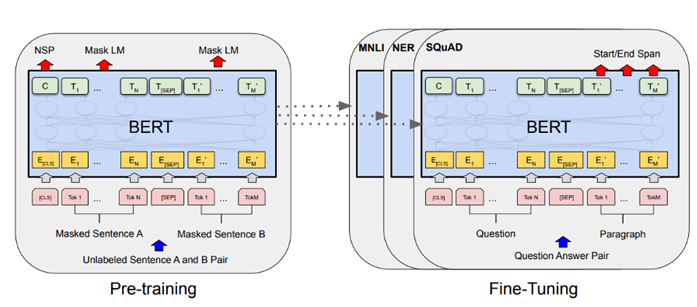

BERT를 이용한 자연어 처리 단계
1. Pre-training: 거대 Encoder가 입력 문장들을 임베딩하여 언어를 모델링
2. fine-tuning: 여러 자연어 처리 task 수행

***다른 사전 학습 모델 구조 비교**
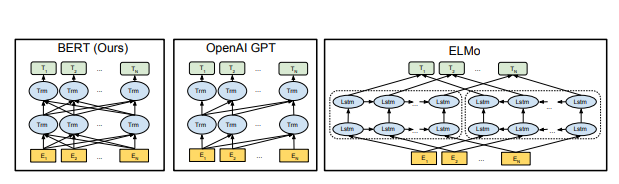

- **ELMo**: 좌-우, 우-좌 문맥을 각각 독립적으로 계산하여 접합
- **OpenAI GPT**: 좌-우로만 계산
> 두 모델 모두 공통적으로 양방향 문맥 등을 보지 못하여 충분히 언어 표현을 하지 못하는 단점 존재
- **BERT**: 사전 학습을 위해 두 가지 방법 사용
  1. MSM (Masked Language Model)
  2. NSP (Next Sentence Prediction)
  > 양방향으로 학습되어 문맥을 더 잘 파악

##**Transformer 기반의 BERT**
- BERT는 MLM과 NSP를 위해 Transformer 기반으로 구성
- BERT는 Transformer의 인코더-디코더 중 인코더만 사용
> Transformer는 기존 인코더-디코더 모델과 달리 CNN과 RNN을 사용하지 않고 self-attention 개념 도입

###1) BERT의 MLM(Masked Language Model)
**MLM(Masked Laguage Model)**
- 일련의 단어가 주어지면 그 단어를 예측하는 작업
- 모든 토큰을 예측하는 것이 아닌 무작위로 몇 개의 토큰을 마스킹하고 Transformer 구조에 넣어 주변 단어의 맥락으로 마스킹된 토큰을 예측
  - 토큰 중 15%는 무작위로 [MASK] 토큰으로 변경
- [MASK\] 토큰만을 예측하는 pre training 작업을 수행
  - [MASK\] 토큰은 pre-training에만 사용, fine-tuning 시에는 사용되지 않음
--> MLM을 수행하면서 BERT는 문맥을 파악하는 능력을 길러냄

###2) BERT의 NSP(Next Sentence Prediction)
**NSP(Next Sentence Prediction)**
- 두 문장의 관계를 이해하기 위해 두 번째 문장이 첫 번째 문장의 바로 다음에 오는 문장인지 예측
  - [SEP\] 특수 토큰으로 문장 분리
  - 학습 중에 모델에 입력으로 두 개의 문장이 동시에 제공
    1. 실제 두 번째 문장이 첫 번째 문장뒤에 오는 문장
    2. 전체 말뭉치에서 나오는 임의의 문장
  - BERT는 임의의 문장이 첫 번째 문장에서 분리된다는 가정 하에 두 번째 문장이 임의의 문장인 여부를 예측


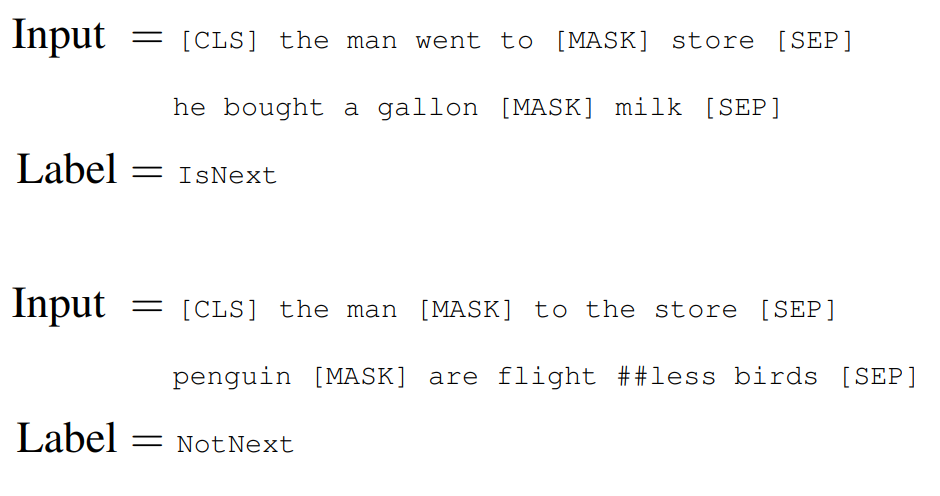

***BERT는 손실 함수를 최소화하기 위해 MLM과 NSP를 함께 학습**